In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
def generate_dots(mu, sigama):
    num_points = 70
    return np.random.multivariate_normal(mu, sigama, num_points)

dotsdict = dict()
dotsdict['1'] = generate_dots(np.array([-1, -1]), np.array([[1, 0.5], [0.5, 1]]))
dotsdict['2'] = generate_dots(np.array([6, 2]), np.array([[1, 0], [0, 1]]))
dotsdict['3'] = generate_dots(np.array([0.5, 7]), np.array([[1, -0.5], [-0.5, 1]]))

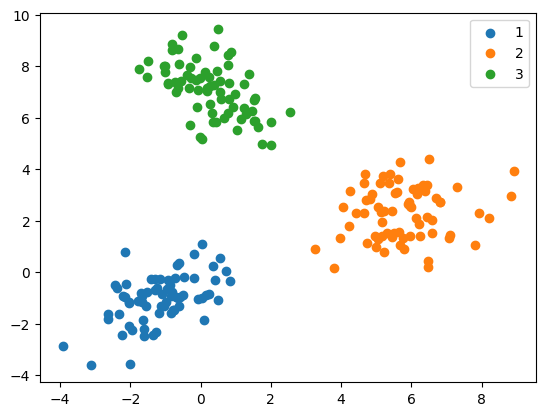

In [68]:
for k, v in dotsdict.items():
    plt.scatter(v[:, 0], v[:, 1], label=k)
plt.legend()
plt.show()

In [69]:
dotsall = np.vstack((dotsdict['1'], dotsdict['2'], dotsdict['3']))
print("总共的随机点个数" ,dotsall.shape)

总共的随机点个数 (210, 2)


In [70]:
print(dotsall)

[[-0.86003911 -0.51841212]
 [-0.75208075 -1.45503281]
 [-2.04499871 -1.15766502]
 [-1.34799443 -2.45116055]
 [-0.07607436 -1.03096743]
 [ 0.08971496 -1.8719346 ]
 [-1.300095   -0.70807264]
 [-1.6039876  -2.4686041 ]
 [-1.55686087 -1.32689828]
 [-0.57434179 -0.95282634]
 [-3.92838305 -2.86205409]
 [-0.91478194 -0.32420803]
 [ 0.48426106 -1.08947901]
 [-0.47662001 -0.18077124]
 [-0.84740568 -0.93649275]
 [-0.97760842 -1.16880126]
 [-1.65969833 -1.17732482]
 [-0.80706167 -0.77090149]
 [-0.71435278 -0.97556545]
 [ 0.03882476 -1.01289968]
 [-2.44194401 -0.4848383 ]
 [-0.50202765 -0.88295313]
 [ 0.55027736  0.56117413]
 [-1.22876765 -0.63523804]
 [-2.11531255 -0.47732382]
 [ 0.83938501 -0.34236026]
 [-0.66762128  0.28914122]
 [-2.02229206 -3.56343376]
 [-2.36699327 -0.63375113]
 [-1.0531141  -1.30983858]
 [-2.02883706 -1.20100722]
 [-0.62947471 -0.99310989]
 [-0.91720957 -0.65806305]
 [ 0.16403833 -0.89264441]
 [-0.61600099  0.35297987]
 [-0.84830465 -1.57640271]
 [-1.79586166 -1.12656099]
 

In [71]:
from random import random
import random

In [72]:
class KMeans():
    eps = 1e-6
    def __init__(self, k, dots):
        self.k = k
        self.dots = dots
        self.kcenterdict = dict()
        self.kdots = dict()
        self.state = random.getstate()
        self.__initrandomcenter()
        self.__initkdots()
        self.changed = True
        self.internum = 0
        
    
    def __initrandomcenter(self):
        random.setstate(self.state)
        temp = random.sample(range(0, len(self.dots)), self.k)
        for i in range(self.k):
            self.kcenterdict[i] = self.dots[temp[i]]
        print("初始随机中心点\n", self.kcenterdict)
        
    def __initkdots(self):
        for i in range(self.k):
            self.kdots[i] = []
            
    def fit(self):
        while self.changed:
            print("迭代次数", self.internum)
            print(self.kcenterdict)
            self.__initkdots()
            for dot in self.dots:
                nearest = self.__getnearest(dot)
                self.kdots[nearest].append(dot)
            self.__updatecenter()
            self.internum += 1
        return self.kdots, self.kcenterdict
    
    def __updatecenter(self):
        for i in range(self.k):
            newx = sum([x for x, _ in self.kdots[i]]) / len(self.kdots[i])
            newy = sum([y for _, y in self.kdots[i]]) / len(self.kdots[i])
            if(abs(newx - self.kcenterdict[i][0]) < self.eps and abs(newy - self.kcenterdict[i][1]) < self.eps):
                self.changed = False
            else:
                # self.changed = True
                self.kcenterdict[i] = (newx, newy)

    def __getnearest(self, dot):
        mindis = float('inf') 
        index = None
        for i in range(self.k):
            x1, y1 = dot
            x2, y2 = self.kcenterdict[i]
            dis = ((x1 - x2) ** 2 + (y1 - y2) ** 2)**0.5
            if dis < mindis:
                mindis = dis
                index = i
        if index is None:
            raise ValueError("index is None")
        return index
    

In [73]:
def cal_adtcc(res, kcenter):
    """"
    计算每个样本点到聚类中心的距离
    Args:
        res (_type_): _description_
        kcenter (_type_): _description_
    """
    dis = 0
    cnt = 0
    for k, v in res.items():
        center_x = kcenter[k][0]
        center_y = kcenter[k][1]
        for dot in v:
            cnt += 1
            x, y = dot[0], dot[1]
            dis += ((x - center_x) ** 2 + (y - center_y) ** 2) ** 0.5
    return dis / cnt
            

In [74]:
def draw(res, kcenter, k, ax):
    ax.set_title(f'k={k}')
    for c, v in res.items():
        ax.scatter([x for x, _ in v], [y for _, y in v], label=c)
        ax.scatter(kcenter[c][0], kcenter[c][1], label=f'center of cluster {c}')
    ax.legend()

********** k=1 **********
初始随机中心点
 {0: array([5.29569556, 1.53349968])}
迭代次数 0
{0: array([5.29569556, 1.53349968])}
迭代次数 1
{0: (1.6413171458373614, 2.7890999938926386)}
********** k=2 **********
初始随机中心点
 {0: array([5.95202357, 2.56119832]), 1: array([0.33324683, 6.16797937])}
迭代次数 0
{0: array([5.95202357, 2.56119832]), 1: array([0.33324683, 6.16797937])}
迭代次数 1
{0: (5.148309273078204, 1.9425330155460778), 1: (-0.4735865034147481, 3.299625118239038)}
迭代次数 2
{0: (5.768610918080396, 2.297032608788826), 1: (-0.4223297402841548, 3.0351336864445453)}
********** k=3 **********
初始随机中心点
 {0: array([0.42777342, 5.82458887]), 1: array([0.3514686 , 0.22180772]), 2: array([-0.91478194, -0.32420803])}
迭代次数 0
{0: array([0.42777342, 5.82458887]), 1: array([0.3514686 , 0.22180772]), 2: array([-0.91478194, -0.32420803])}
迭代次数 1
{0: (1.6451953456885335, 6.21717776484274), 1: (4.6805355928776855, 1.4190921294082046), 2: (-1.4039486636827525, -1.186369343782406)}
迭代次数 2
{0: (0.2897207668629723, 7.085891387

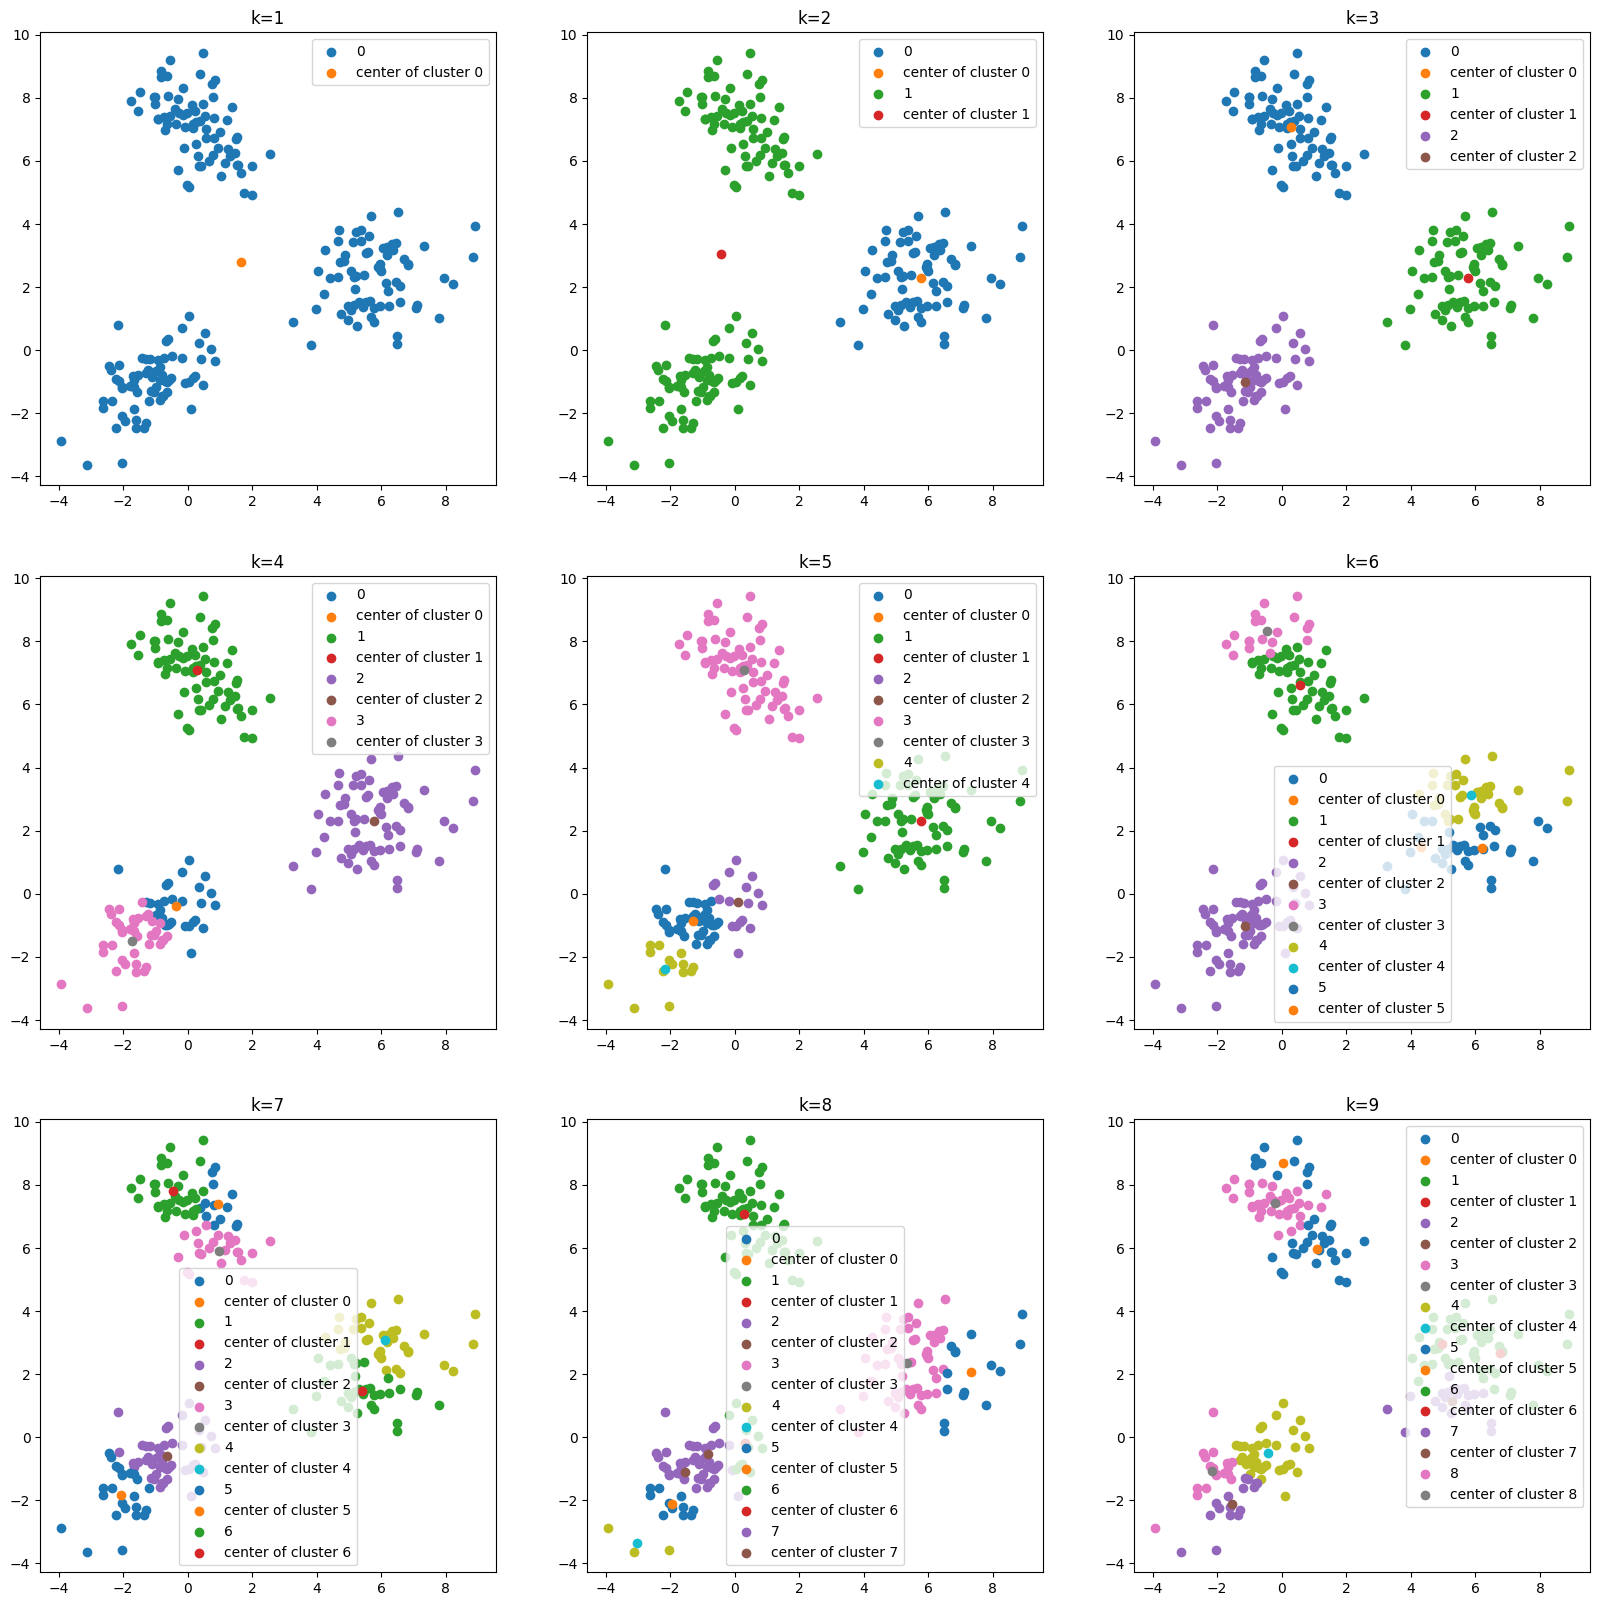

Text(0, 0.5, 'Avg Distance to Cluster Center')

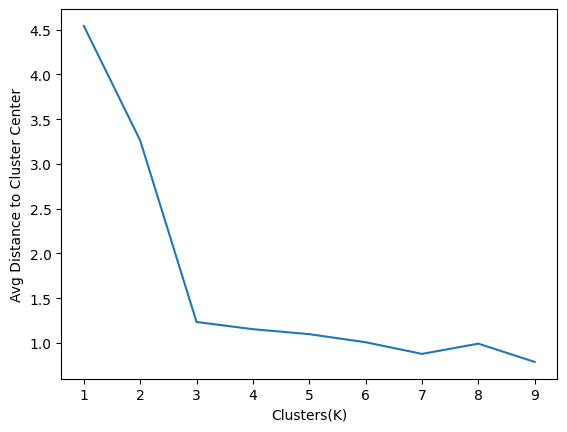

In [75]:
kbegin = 1
kend = 9
adtcc = []
plt.figure(figsize=(20,20))
for k in range(kbegin, kend+1):
    print('*'*10, f'k={k}','*'*10)
    kmeans = KMeans(k, dotsall)
    res, kcenter = kmeans.fit()
    adtcc.append(cal_adtcc(res, kcenter))
    ax = plt.subplot(3,3,k)
    draw(res, kcenter, k, ax)
plt.show()
plt.plot(range(kbegin, kend + 1), adtcc)
plt.xlabel("Clusters(K)")
plt.ylabel("Avg Distance to Cluster Center")

## 结论
- 采取类内距离准则作为衡量标准，即y轴代表类内距离
- 由图像，在K=3之前，类内距离随着K增大迅速减小；当在K=3之后，类内距离随着K的增大缓慢减小。
- 由有效性检验相关知识，合理聚类数K=3